# CLAIRVOYANT ROBO INVESTMENTS: ANY MORE HUMAN AND WE'D BLEED

In [12]:
## Import Libraries
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import requests
import urllib.request 
import os
import seaborn as sns
import yfinance as yf
from datetime import date
from pathlib import Path
from dotenv import load_dotenv
from datetime import date
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import FundamentalAnalysis as fa
import json 
from pathlib import Path
import numpy as np
import yaml
import io
from MCForecastTools import MCSimulation
import pytz
import glob


## Client Onboarding and Portfolio Selection

In [39]:
## Import client KYC form as .yaml file
#with open("jus_form.yaml") as file:    
   # kyc_data = yaml.load(file, Loader=yaml.FullLoader)
    #print(kyc_data)

In [40]:
#with open(r"jus_form.yaml") as file:
    #df = pd.json_normalize(yaml.load(file, Loader=yaml.FullLoader))
#columns = ["Date", "First Name", "Last Name", "Birth Date", "Annual Income", "Initial Investment", "Occupation", "Investment Goals", "Investment Time Horizon", "Risk Tolerance", "Investment Constraints"]
#df.columns = columns
#df.head()

In [41]:
## View KYC form if desired:
#kyc_form = yaml.dump(kyc_data, sort_keys=False)
#print(kyc_form)

In [38]:
path = r"C:\Users\justi\Documents\01_UofT_BC_Fintech\01_Homework\BC_Project_1"
all_files = glob.glob(path + "/*.yaml")
li = []
for filename in all_files[:10]:
    with open(filename, "r") as fh:
        df = pd.json_normalize(yaml.safe_load(fh.read()))
    li.append(df)
all_cust_kyc = pd.concat(li)
columns = ["Date", "First Name", "Last Name", "Birth Date", "Annual Income", "Initial Investment", "Occupation", "Investment Goals", "Investment Time Horizon", "Risk Tolerance", "Investment Constraints"]
all_cust_kyc.columns = columns
all_cust_kyc = all_cust_kyc.set_index(all_cust_kyc["Date"])
all_cust_kyc = all_cust_kyc.drop(columns=["Date"])
all_cust_kyc = all_cust_kyc.sort_index()
all_cust_kyc

,First Name,Last Name,Birth Date,Annual Income,Initial Investment,Occupation,Investment Goals,Investment Time Horizon,Risk Tolerance,Investment Constraints
Date,,,,,,,,,,
2015-05-08,Coney,Dacanay,1988-01-01,200000,75000,None,growth,20,medium,none
2015-12-05,Dipendra,Shastri,1982-01-01,150000,50000,None,growth,30,high,none
2018-05-07,Yu,Wang,1985-01-01,100000,20000,None,growth,15,high,none
2019-07-08,Justin,Gouin,1987-11-07,100000,20000,None,growth,30,high,none
2021-03-08,Sherin,Sher,1985-01-01,75000,20000,None,growth,10,low,none


In [45]:
#automate a loop or a function to select the datapoints 
all_cust_kyc.iloc[4,8]

for person in 

#make it so we are just call the columns and the index row is given by calling a particular row (say by name for exmaple) 

'low'

In [43]:
## Extract key data points from client KYC form
risk = kyc_data["intake_form"]["risk_tolerance"]
income = kyc_data["intake_form"]["annual_income"]
goals = kyc_data["intake_form"]["investment_goals"]
horizon = kyc_data["intake_form"]["investment_time_horizon"]
initial_investment: kyc_data["intake_form"]["initial_investment"]

In [44]:
## Categorize client's Risk Tolerance
if risk == "low":
    r = 0
elif risk == "medium":
    r = 1
elif risk == "high":
    r = 2
print(r)

2


In [45]:
## Categorize client's Annual Income
if income <= 75000:
    i = 0
elif income >= 75001 and income <= 150000:
    i = 1
elif income >= 150001:
    i = 2
print(i)

1


In [46]:
## Categorize client's Investment Goals
if goals == "preservation":
    g = 0
elif goals == "income":
    g = 1
elif goals == "growth":
    g = 2
print(g)

2


In [47]:
### Categorize client's Time Horizon:
if horizon >= 0 and horizon <= 10:
    h = 3
elif horizon >= 11 and horizon <= 20:
    h = 2
elif horizon >= 21:
    h = 1
print(h)

1


In [48]:
## Compile client categorizations to determine portfolio suitability:
client_portfolio_number = r + i + g + h
if client_portfolio_number >= 0 and client_portfolio_number <= 1.5:
    pn = 1
if client_portfolio_number >= 2 and client_portfolio_number <= 4.5:
    pn = 2
if client_portfolio_number >= 5: 
    pn = 3
print(pn)

3


## Define the Portfolios / Import Dataset / Clean Data / Prepare Data for Presentation to Client

In [49]:
### EXTRA ## Create a 'for loop' to automatically call APIs based on the Portfolio Number (PN)

In [50]:
## Import Stock Data
stocks = yf.download("SPY AAPL AMZN DAL GE JNJ MSFT MNST PYPL SHOP UPS", start="2001-04-01", end="2021-04-01").Close
stocks.head()

[*********************100%***********************]  11 of 11 completed


,AAPL,AMZN,DAL,GE,JNJ,MNST,MSFT,PYPL,SHOP,SPY,UPS
Date,,,,,,,,,,,
2001-04-02,0.385536,9.10,NaN,40.192307,43.660000,0.069661,27.90625,NaN,NaN,114.199997,55.580002
2001-04-03,0.361429,8.63,NaN,38.153847,43.055000,0.068359,26.68750,NaN,NaN,110.389999,53.209999
2001-04-04,0.348214,8.40,NaN,38.076923,43.455002,0.067708,25.96875,NaN,NaN,110.849998,52.959999
2001-04-05,0.372679,9.12,NaN,40.480770,44.439999,0.067708,28.37500,NaN,NaN,115.050003,53.320000
2001-04-06,0.367679,8.37,NaN,39.586536,45.195000,0.069010,28.09375,NaN,NaN,113.300003,54.180000


In [52]:
## Analyze the dataset to ensure there are no null entries
stocks.isnull().sum()

AAPL       0
AMZN       0
DAL     1528
GE         0
JNJ        0
MNST       0
MSFT       0
PYPL    3585
SHOP    3554
SPY        0
UPS        0
dtype: int64

In [53]:
stocks.dropna(inplace=True)
stocks.isnull().sum()

AAPL    0
AMZN    0
DAL     0
GE      0
JNJ     0
MNST    0
MSFT    0
PYPL    0
SHOP    0
SPY     0
UPS     0
dtype: int64

In [54]:
## Calculate Daily Percent Changes
stocks_rtn = stocks.pct_change()

In [57]:
## Calculate the standard deviation
stocks_std = stocks_rtn.std()
stocks_std = stocks_std.sort_values()
stocks_std

SPY     0.011826
JNJ     0.012375
UPS     0.015930
MSFT    0.017456
MNST    0.018211
AAPL    0.019099
AMZN    0.019216
PYPL    0.022030
GE      0.024483
DAL     0.026485
SHOP    0.033246
dtype: float64

#### Define Portfolios and Define Code for Selection

In [58]:
##COULD BE DONE WITH BINNING?

# Create the variable bins to define our bounds for when we cut the dataframe.
##bins = [0, 30000, 70000, 100000, 200000]

# Create names for the bins
##group_names = ["Low", "Moderate", "Above Average", "High"]

# Add a column named "Salary Level" to people_df and slice the data into the bins
##people_df["Salary Level"] = pd.cut(people_df["Salary"], bins, labels=group_names)

##people_df.head()

In [59]:
portfolio_1 = stocks.drop(columns=["SPY", "SHOP", "DAL", "GE", "PYPL"]) 
portfolio_2 = stocks.drop(columns=["SPY", "JNJ", "UPS", "SHOP", "DAL"])
portfolio_3 = stocks.drop(columns=["SPY", "JNJ", "UPS", "MSFT", "MNST"])

In [60]:
if pn == 1:
    portfolio = portfolio_1
elif pn == 2:
    portfolio = portfolio_2
elif pn == 3:
    portfolio = portfolio_3

In [61]:
portfolio.describe()

,AAPL,AMZN,DAL,GE,PYPL,SHOP
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,52.984367,1539.218595,47.393126,17.544473,91.029066,287.946010
std,29.705451,824.384001,9.213564,8.800311,57.864171,350.683510
min,22.584999,429.700012,19.190001,5.490000,30.629999,19.330000
25%,29.993750,806.182495,42.865001,9.992500,40.497501,43.290000
50%,43.558750,1572.349976,49.389999,13.431538,80.645000,136.800003
75%,59.768126,1893.222504,54.157498,27.766828,108.767498,337.757492
max,143.160004,3531.449951,63.160000,31.663462,304.790009,1474.000000


In [62]:
# Calculate the correlation
portfolio_rtn = portfolio.pct_change()
correlation = portfolio_rtn.corr()
# Display de correlation matrix
correlation

,AAPL,AMZN,DAL,GE,PYPL,SHOP
AAPL,1.000000,0.587826,0.324324,0.324375,0.586278,0.426582
AMZN,0.587826,1.000000,0.191837,0.199658,0.543531,0.485809
DAL,0.324324,0.191837,1.000000,0.483712,0.273492,0.174434
GE,0.324375,0.199658,0.483712,1.000000,0.232469,0.137533
PYPL,0.586278,0.543531,0.273492,0.232469,1.000000,0.516310
SHOP,0.426582,0.485809,0.174434,0.137533,0.516310,1.000000


<AxesSubplot:xlabel='Date'>

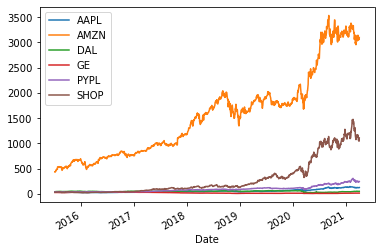

In [63]:
portfolio.plot()

In [65]:
## Calculate the standard deviation
portfolio_std = portfolio_rtn.std()
portfolio_std = portfolio_std.sort_values()
portfolio_std.tail()

AMZN    0.019216
PYPL    0.022030
GE      0.024483
DAL     0.026485
SHOP    0.033246
dtype: float64

In [66]:
## Calculate the annualized standard deviation
ann_portfolio_std = portfolio_std * np.sqrt(252)
ann_portfolio_std = ann_portfolio_std.sort_values()
ann_portfolio_std

AAPL    0.303192
AMZN    0.305042
PYPL    0.349723
GE      0.388658
DAL     0.420444
SHOP    0.527766
dtype: float64

<AxesSubplot:xlabel='Date'>

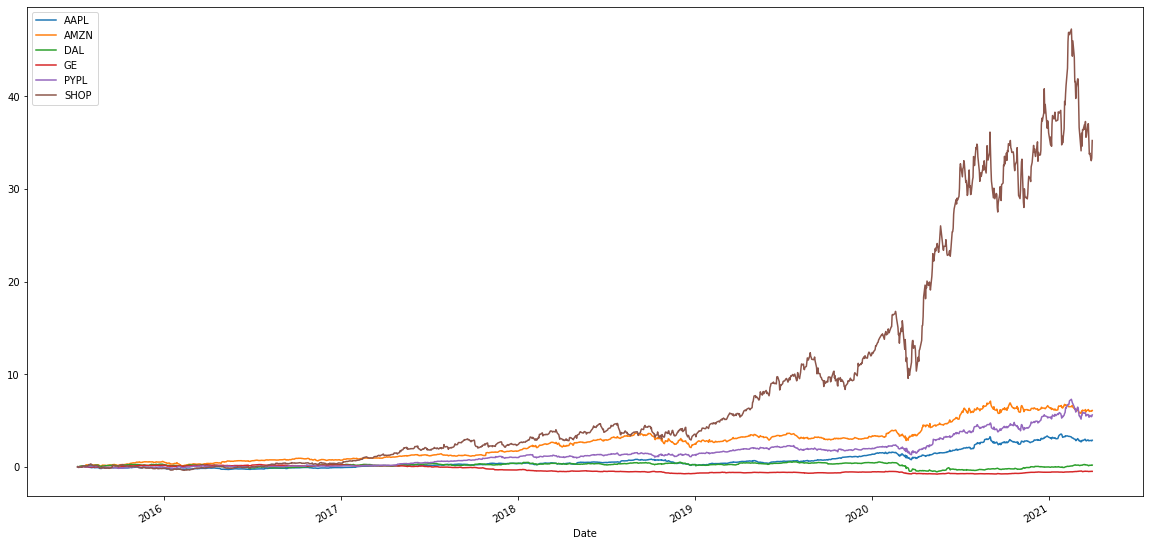

In [64]:
# Calculate cumulative returns of all portfolios
portfolio_cum = (1 + portfolio_rtn).cumprod()-1
# Plot cumulative returns
portfolio_cum.plot(kind="line", figsize=(20,10))

In [ ]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10))

In [67]:
### TOTAL PORTFOLIO PERCENT CHANGE AS A SINGLE DATAFRAME

### Sharpe Ratios

In [68]:
## Import Risk Free Rate

In [ ]:
t_bill_10_yr = yf.download("^TNX", start="2001-04-01", end="2021-04-01").Close

In [ ]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([portfolio, t_bill_10_yr], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

### Monte Carlo Simulation

In [ ]:
## If horizon = XXX. . . num_trading_days = 252* XXX

In [ ]:
# 20 years of historical data
start_date = pd.Timestamp('2001-04-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the stock tickers
tickers = ["SPY", "AGG"]
df_1000 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_1000.sort_index().head()

In [ ]:
portfolio_MC = MCSimulation(
    portfolio_data = portfolio_rtn,
    weights = [7.69, ],
    num_simulation = 500,
    num_trading_days = 252*30
)
portfolio_rtn.calc_cumulative_return()

In [ ]:
retirement_MC.portfolio_data.tail()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_MC.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
plot = retirement_MC.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = retirement_MC.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stats = retirement_MC.summarize_cumulative_return()


# Print summary statistics
print(stats)

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

In [73]:
fa.available_companies("bee73dfea0cf26c6dca8b1374f4488a5")

,name,price,exchange
symbol,,,
SPY,SPDR S&P 500,406.59,New York Stock Exchange Arca
CMCSA,Comcast Corp,54.60,Nasdaq Global Select
KMI,Kinder Morgan Inc,16.93,New York Stock Exchange
INTC,Intel Corp,66.25,Nasdaq Global Select
MU,Micron Technology Inc,93.96,Nasdaq Global Select
...,...,...,...
CMLTU,CM Life Sciences III Inc. Unit,11.19,NasdaqGS
MACA,Moringa Acquisition Corp Class A Ordinary Shares,10.00,NasdaqGS
MACAW,Moringa Acquisition Corp Warrant,0.00,Nasdaq


In [74]:
import FundamentalAnalysis as fa

ticker = "AAPL"
api_key = "bee73dfea0cf26c6dca8b1374f4488a5"

# Show the available companies
companies = fa.available_companies(api_key)

# Collect general company information
profile = fa.profile(ticker, api_key)

# Collect recent company quotes
quotes = fa.quote(ticker, api_key)

# Collect market cap and enterprise value
entreprise_value = fa.enterprise(ticker, api_key)

# Show recommendations of Analysts
ratings = fa.rating(ticker, api_key)

# Obtain DCFs over time
dcf_annually = fa.discounted_cash_flow(ticker, api_key, period="annual")
dcf_quarterly = fa.discounted_cash_flow(ticker, api_key, period="quarter")

# Collect the Balance Sheet statements
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")
balance_sheet_quarterly = fa.balance_sheet_statement(ticker, api_key, period="quarter")

# Collect the Income Statements
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")
income_statement_quarterly = fa.income_statement(ticker, api_key, period="quarter")

# Collect the Cash Flow Statements
cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")
cash_flow_statement_quarterly = fa.cash_flow_statement(ticker, api_key, period="quarter")

# Show Key Metrics
key_metrics_annually = fa.key_metrics(ticker, api_key, period="annual")
key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")

# Show a large set of in-depth ratios
financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")
financial_ratios_quarterly = fa.financial_ratios(ticker, api_key, period="quarter")

# Show the growth of the company
growth_annually = fa.financial_statement_growth(ticker, api_key, period="annual")
growth_quarterly = fa.financial_statement_growth(ticker, api_key, period="quarter")

# Download general stock data
stock_data = fa.stock_data(ticker, period="ytd", interval="1d")

# Download detailed stock data
stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2000-01-01", end="2020-01-01")

In [75]:
SPY_profile = fa.financial_ratios("ICBU", api_key)
display(SPY_profile)

""


In [76]:
data = requests.get(request_url).json()

NameError: name 'request_url' is not defined